# Inteligência Computacional
## Conjuntos Fuzzy
### Engenharia de Computação - CEFET-MG
#### Diego Henrique Almeida Trindade

In [1]:
# imports necessários
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# funções de pertinência
def pert_triangular(x, a, m, b):
    return max(min((x - a) / (m - a), (b - x) / (b - m)), 0)


def pert_trapezoidal(x, a, m, n, b):
    return max(
        min(
            (x - a) / (m - a),
            1,
            (b - x) / (b - n),
        ),
        0,
    )


def pert_gaussiana(x, m, k):
    return np.exp(-k * (x - m) ** 2)

In [3]:
# operadores
def comp_zadeh(a):
    c1 = 1 - a
    return c1


def comp_sugeno(a, s):
    if s >= -1:
        c2 = (1 - a) / (1 + s * a)
    else:
        print("Erro Sugeno.")
        c2 = None
    return c2


def comp_yager(a, w):
    if w >= 0:
        c3 = (1 - a**w) ** (1 / w)
    else:
        print("Erro Yager.")
        c3 = None
    return c3


def maximo(a, b):
    u1 = max(a, b)
    return u1


def soma_prob(a, b):
    u2 = a + b - a * b
    return u2


def soma_limit(a, b):
    u3 = min(1, a + b)
    return u3


def soma_drast(a, b):
    if b == 0:
        u4 = a
    elif a == 0:
        u4 = b
    else:
        u4 = 1
    return u4


def minimo(a, b):
    i1 = (a, b)
    return i1


def produto(a, b):
    i2 = a * b
    return i2


def produto_limit(a, b):
    i3 = max(0, a + b - 1)
    return i3


def produto_drast(a, b):
    if b == 1:
        i4 = a
    elif a == 1:
        i4 = b
    else:
        i4 = 0
    return i4

In [4]:
# função que plota os gráficos


def plot(x, y, title):
    plt.figure(figsize=(8, 6))
    for i in range(0, len(y)):
        plt.plot(x, y[i], label=("y" + str(i + 1)))

    plt.xlabel("Universo de Discurso - (X)")
    plt.ylabel("Grau de Pertinência - mi(x)")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [5]:
# valores para teste

x = np.linspace(0, 15, 1000)

y1 = [pert_triangular(xi, 0, 5, 10) for xi in x]
y2 = [pert_triangular(xi, 3, 5, 7) for xi in x]

ytrg = [y1, y2]

y3 = [pert_trapezoidal(xi, 0, 5, 7, 10) for xi in x]
y4 = [pert_trapezoidal(xi, 3, 4, 5, 7) for xi in x]

ytrp = [y3, y4]

y5 = [pert_gaussiana(xi, 3, 1) for xi in x]
y6 = [pert_gaussiana(xi, 7, 0.2) for xi in x]

ygauss = [y5, y6]

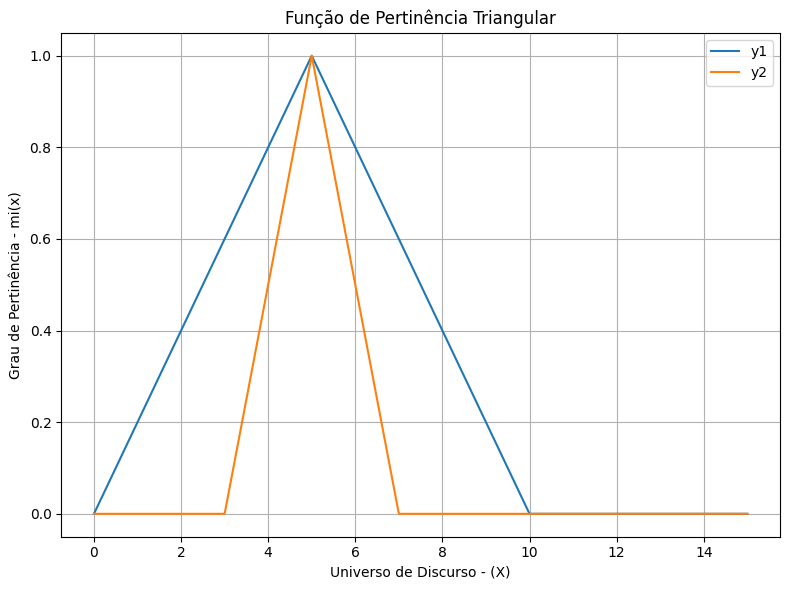

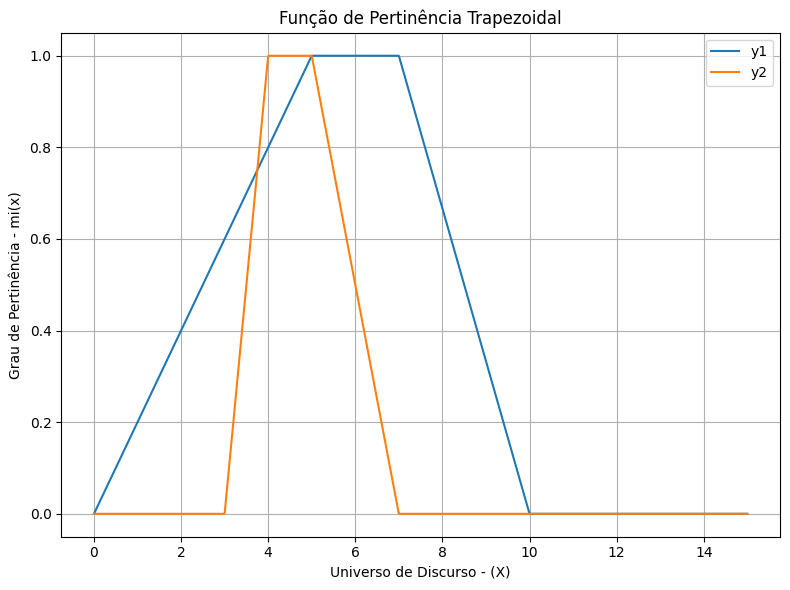

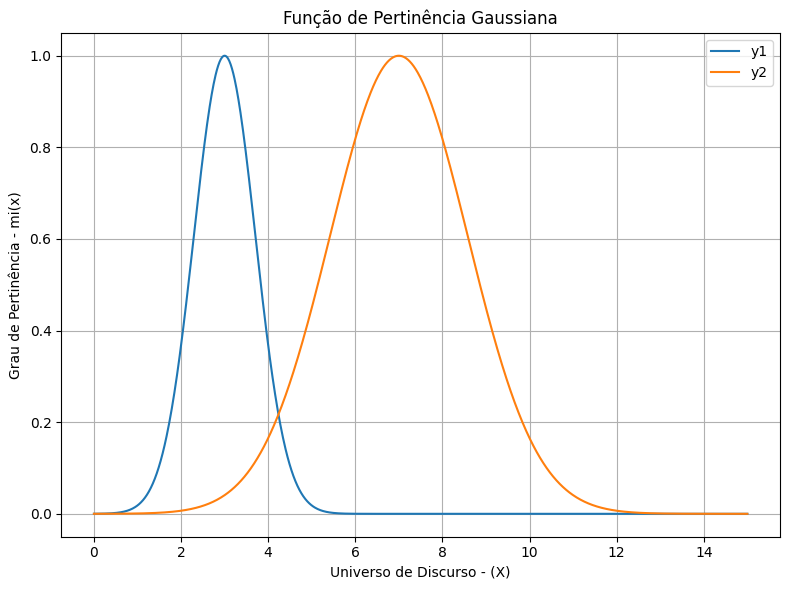

In [6]:
# funções de pertinência
plot(x, ytrg, "Função de Pertinência Triangular")
plot(x, ytrp, "Função de Pertinência Trapezoidal")
plot(x, ygauss, "Função de Pertinência Gaussiana")

In [7]:
# operações

def apply_operation(function_name, ytrg, ytrp, ygauss, s, w):

    ytrg_cp = ytrg.copy()
    ytrp_cp = ytrp.copy()
    ygauss_cp = ygauss.copy()

    match function_name:
        case "zadeh":
            for i in range(len(ytrg_cp)):
                ytrg_cp[i] = [comp_zadeh(a) for a in ytrg[i]]
                ytrp_cp[i] = [comp_zadeh(a) for a in ytrp[i]]
                ygauss_cp[i] = [comp_zadeh(a) for a in ygauss[i]]
            plot(x, ytrg_cp, f"Função de Pertinência Triangular - {function_name}")
            plot(x, ytrp_cp, f"Função de Pertinência Trapezoidal - {function_name}")
            plot(x, ygauss_cp, f"Função de Pertinência Gaussiana - {function_name}")

        case "sugeno":
            for i in range(len(ytrg_cp)):
                ytrg_cp[i] = [comp_sugeno(a, s) for a in ytrg[i]]
                ytrp_cp[i] = [comp_sugeno(a, s) for a in ytrp[i]]
                ygauss_cp[i] = [comp_sugeno(a, s) for a in ygauss[i]]
            plot(x, ytrg_cp, f"Função de Pertinência Triangular - {function_name}")
            plot(x, ytrp_cp, f"Função de Pertinência Trapezoidal - {function_name}")
            plot(x, ygauss_cp, f"Função de Pertinência Gaussiana - {function_name}")

        case "yager":
            for i in range(len(ytrg_cp)):
                ytrg_cp[i] = [comp_yager(a, w) for a in ytrg[i]]
                ytrp_cp[i] = [comp_yager(a, w) for a in ytrp[i]]
                ygauss_cp[i] = [comp_yager(a, w) for a in ygauss[i]]
            plot(x, ytrg_cp, f"Função de Pertinência Triangular - {function_name}")
            plot(x, ytrp_cp, f"Função de Pertinência Trapezoidal - {function_name}")
            plot(x, ygauss_cp, f"Função de Pertinência Gaussiana - {function_name}")

        case "maximo":

            ytrg_result = [maximo(a, b) for a, b in zip(ytrg[0], ytrg[1])]
            ytrg_cp.append(ytrg_result)
            ytrp_result = [maximo(a, b) for a, b in zip(ytrp[0], ytrp[1])]
            ytrp_cp.append(ytrp_result)
            ygauss_result = [maximo(a, b) for a, b in zip(ygauss[0], ygauss[1])]
            ygauss_cp.append(ygauss_result)

            plot(x, ytrg_cp, f"Função de Pertinência Triangular - {function_name}")
            plot(x, ytrp_cp, f"Função de Pertinência Trapezoidal - {function_name}")
            plot(x, ygauss_cp, f"Função de Pertinência Gaussiana - {function_name}")

        case "soma probabilistica":

            ytrg_result = [soma_prob(a, b) for a, b in zip(ytrg[0], ytrg[1])]
            ytrg_cp.append(ytrg_result)
            ytrp_result = [soma_prob(a, b) for a, b in zip(ytrp[0], ytrp[1])]
            ytrp_cp.append(ytrp_result)
            ygauss_result = [soma_prob(a, b) for a, b in zip(ygauss[0], ygauss[1])]
            ygauss_cp.append(ygauss_result)

            plot(x, ytrg_cp, f"Função de Pertinência Triangular - {function_name}")
            plot(x, ytrp_cp, f"Função de Pertinência Trapezoidal - {function_name}")
            plot(x, ygauss_cp, f"Função de Pertinência Gaussiana - {function_name}")

        case "soma limitada":

            ytrg_result = [soma_limit(a, b) for a, b in zip(ytrg[0], ytrg[1])]
            ytrg_cp.append(ytrg_result)
            ytrp_result = [soma_limit(a, b) for a, b in zip(ytrp[0], ytrp[1])]
            ytrp_cp.append(ytrp_result)
            ygauss_result = [soma_limit(a, b) for a, b in zip(ygauss[0], ygauss[1])]
            ygauss_cp.append(ygauss_result)

            plot(x, ytrg_cp, f"Função de Pertinência Triangular - {function_name}")
            plot(x, ytrp_cp, f"Função de Pertinência Trapezoidal - {function_name}")
            plot(x, ygauss_cp, f"Função de Pertinência Gaussiana - {function_name}")

        case "soma drastica":

            ytrg_result = [soma_drast(a, b) for a, b in zip(ytrg[0], ytrg[1])]
            ytrg_cp.append(ytrg_result)
            ytrp_result = [soma_drast(a, b) for a, b in zip(ytrp[0], ytrp[1])]
            ytrp_cp.append(ytrp_result)
            ygauss_result = [soma_drast(a, b) for a, b in zip(ygauss[0], ygauss[1])]
            ygauss_cp.append(ygauss_result)

            plot(x, ytrg_cp, f"Função de Pertinência Triangular - {function_name}")
            plot(x, ytrp_cp, f"Função de Pertinência Trapezoidal - {function_name}")
            plot(x, ygauss_cp, f"Função de Pertinência Gaussiana - {function_name}")

        case "minimo":

            ytrg_result = [minimo(a, b) for a, b in zip(ytrg[0], ytrg[1])]
            ytrg_cp.append(ytrg_result)
            ytrp_result = [minimo(a, b) for a, b in zip(ytrp[0], ytrp[1])]
            ytrp_cp.append(ytrp_result)
            ygauss_result = [minimo(a, b) for a, b in zip(ygauss[0], ygauss[1])]
            ygauss_cp.append(ygauss_result)

            plot(x, ytrg_cp, f"Função de Pertinência Triangular - {function_name}")
            plot(x, ytrp_cp, f"Função de Pertinência Trapezoidal - {function_name}")
            plot(x, ygauss_cp, f"Função de Pertinência Gaussiana - {function_name}")

        case "produto":

            ytrg_result = [produto(a, b) for a, b in zip(ytrg[0], ytrg[1])]
            ytrg_cp.append(ytrg_result)
            ytrp_result = [produto(a, b) for a, b in zip(ytrp[0], ytrp[1])]
            ytrp_cp.append(ytrp_result)
            ygauss_result = [produto(a, b) for a, b in zip(ygauss[0], ygauss[1])]
            ygauss_cp.append(ygauss_result)

            plot(x, ytrg_cp, f"Função de Pertinência Triangular - {function_name}")
            plot(x, ytrp_cp, f"Função de Pertinência Trapezoidal - {function_name}")
            plot(x, ygauss_cp, f"Função de Pertinência Gaussiana - {function_name}")

        case "produto limitado":

            ytrg_result = [produto_limit(a, b) for a, b in zip(ytrg[0], ytrg[1])]
            ytrg_cp.append(ytrg_result)
            ytrp_result = [produto_limit(a, b) for a, b in zip(ytrp[0], ytrp[1])]
            ytrp_cp.append(ytrp_result)
            ygauss_result = [produto_limit(a, b) for a, b in zip(ygauss[0], ygauss[1])]
            ygauss_cp.append(ygauss_result)

            plot(x, ytrg_cp, f"Função de Pertinência Triangular - {function_name}")
            plot(x, ytrp_cp, f"Função de Pertinência Trapezoidal - {function_name}")
            plot(x, ygauss_cp, f"Função de Pertinência Gaussiana - {function_name}")

        case "produto drastico":

            ytrg_result = [produto_drast(a, b) for a, b in zip(ytrg[0], ytrg[1])]
            ytrg_cp.append(ytrg_result)
            ytrp_result = [produto_drast(a, b) for a, b in zip(ytrp[0], ytrp[1])]
            ytrp_cp.append(ytrp_result)
            ygauss_result = [produto_drast(a, b) for a, b in zip(ygauss[0], ygauss[1])]
            ygauss_cp.append(ygauss_result)

            plot(x, ytrg_cp, f"Função de Pertinência Triangular - {function_name}")
            plot(x, ytrp_cp, f"Função de Pertinência Trapezoidal - {function_name}")
            plot(x, ygauss_cp, f"Função de Pertinência Gaussiana - {function_name}")

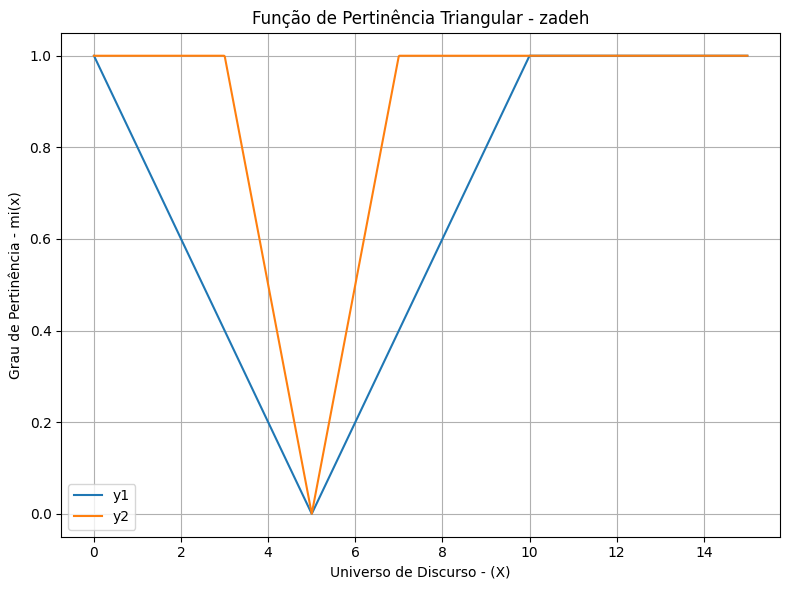

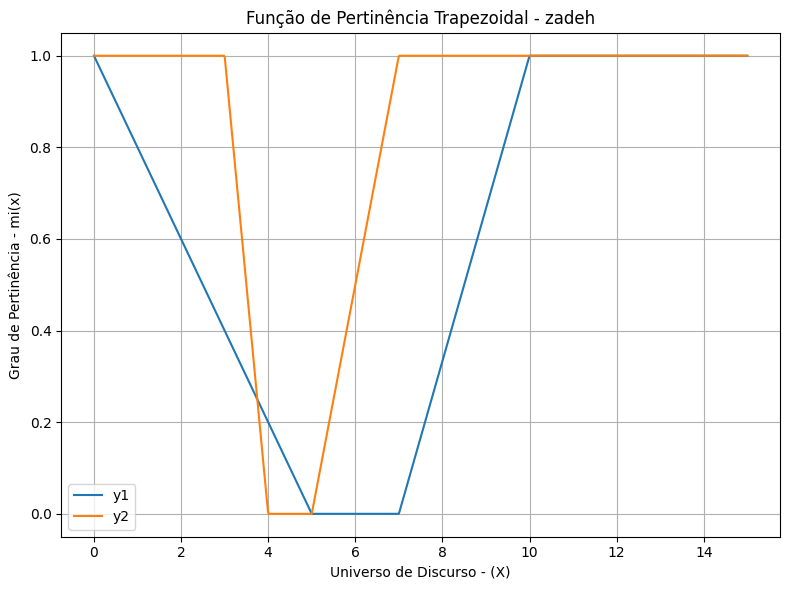

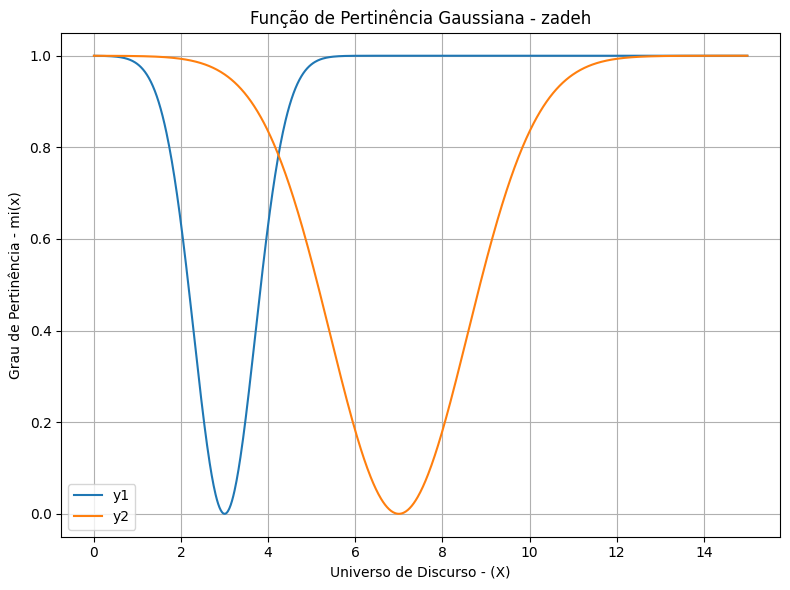

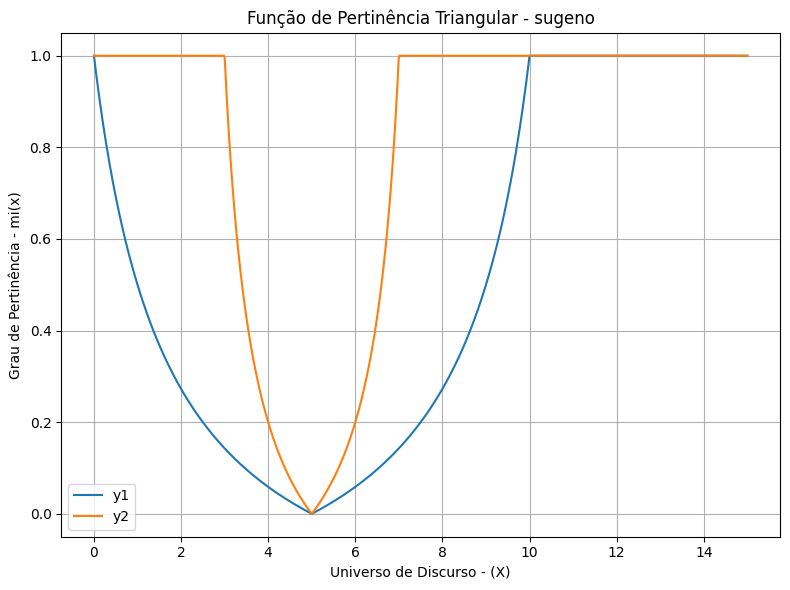

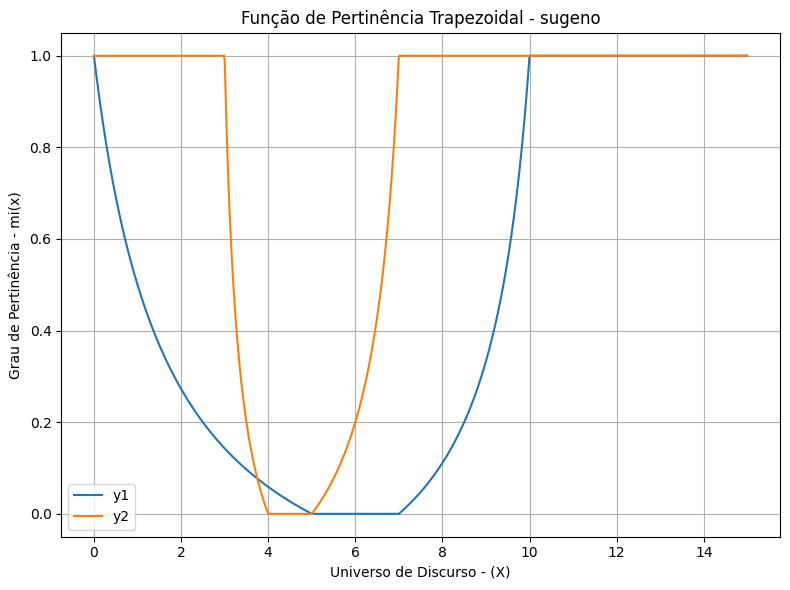

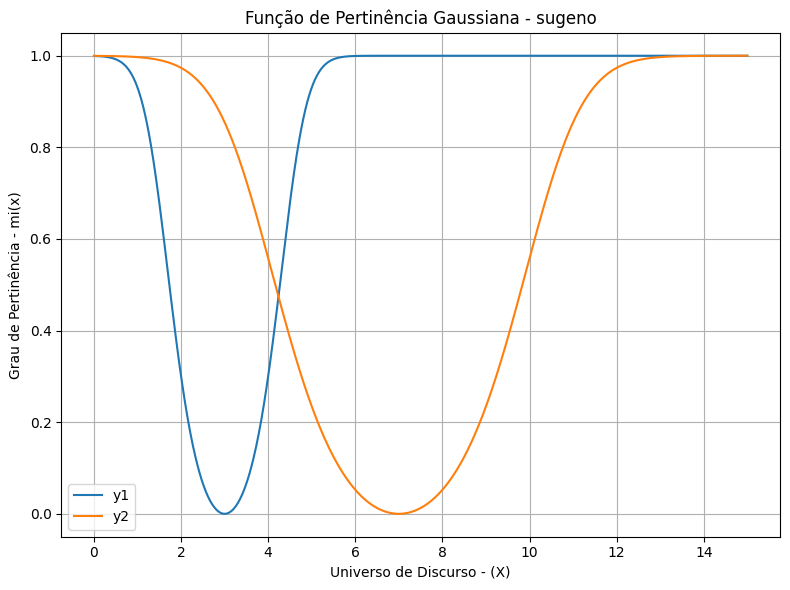

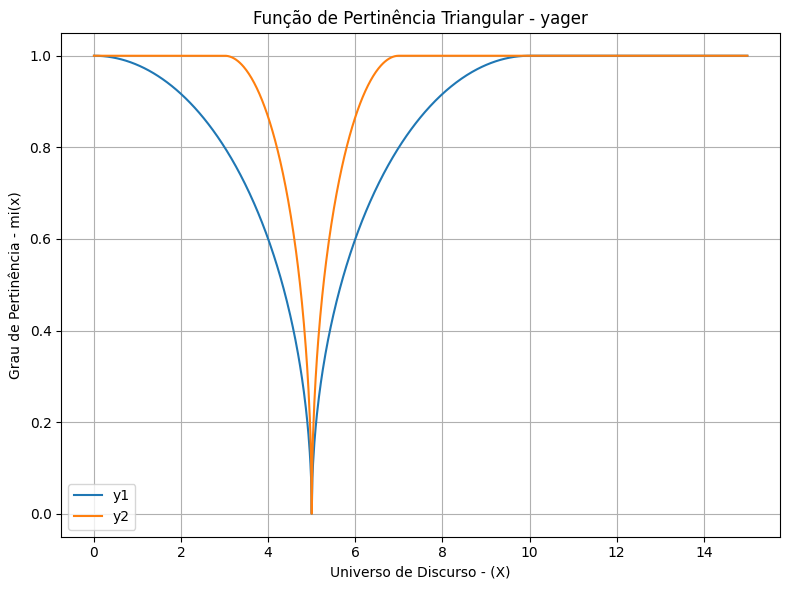

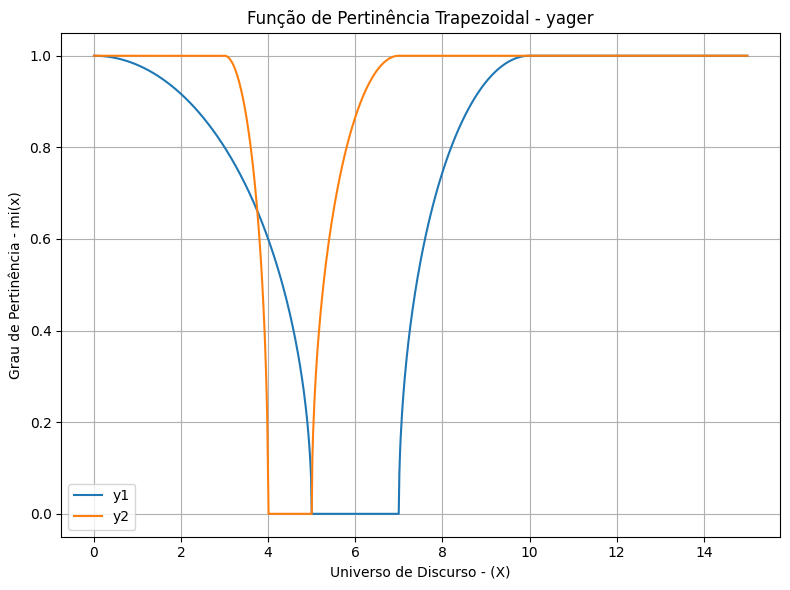

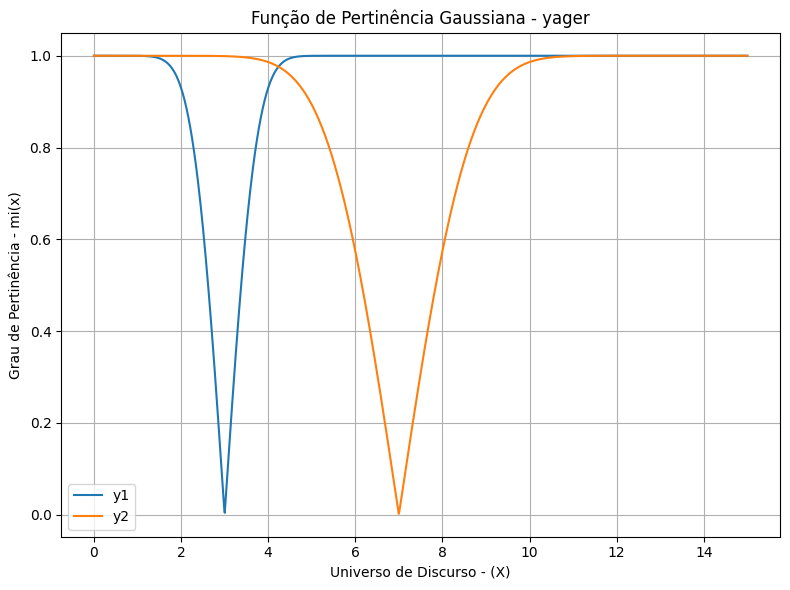

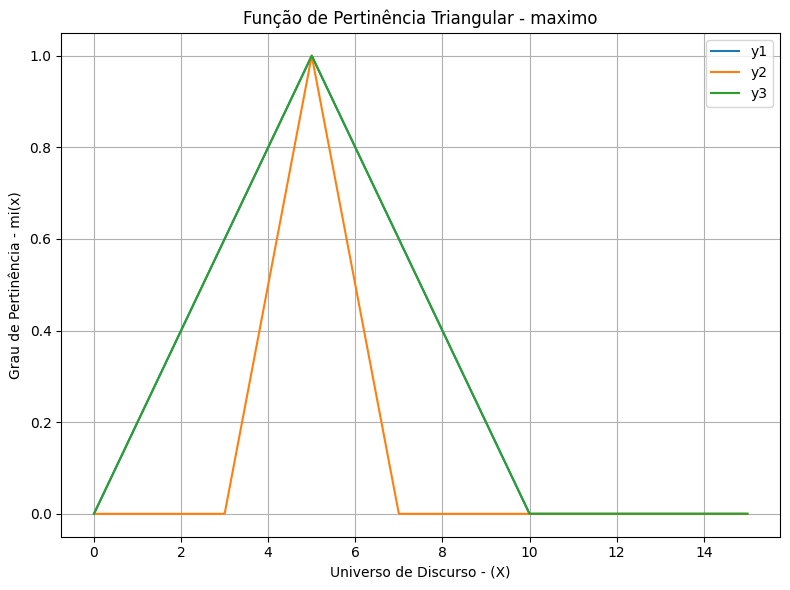

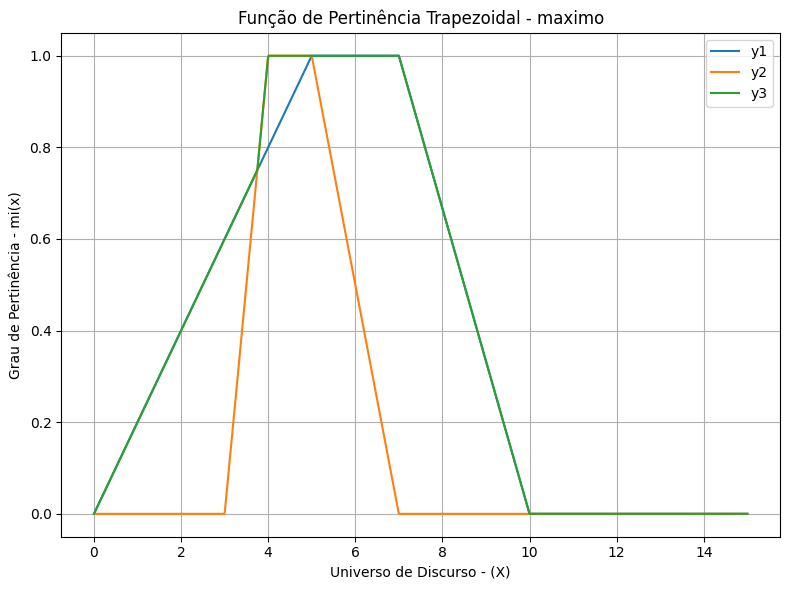

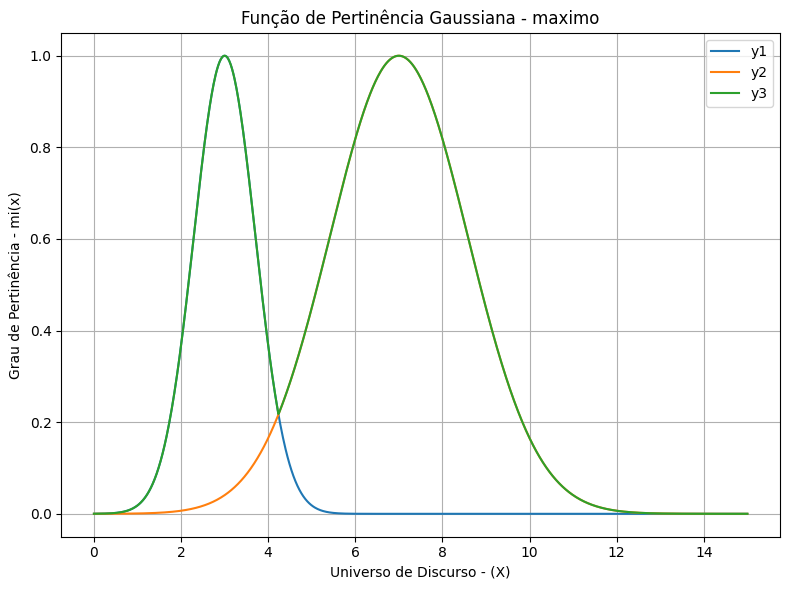

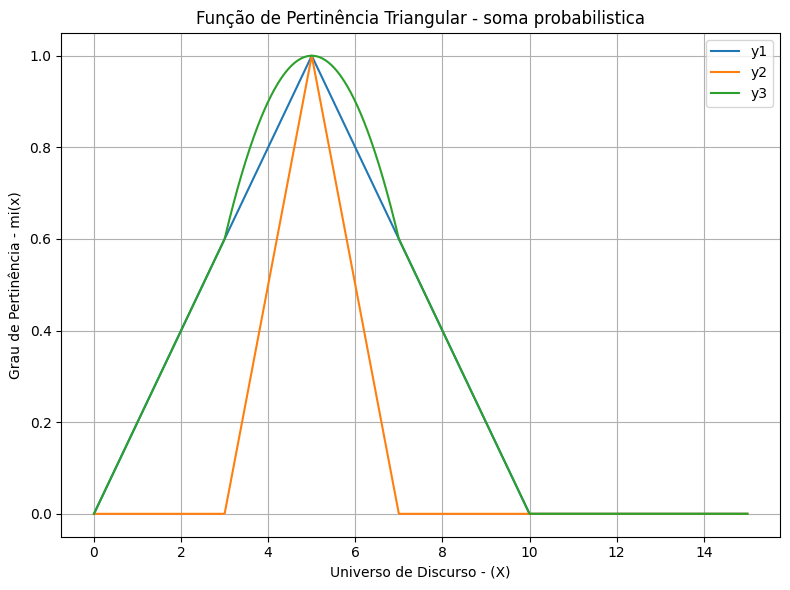

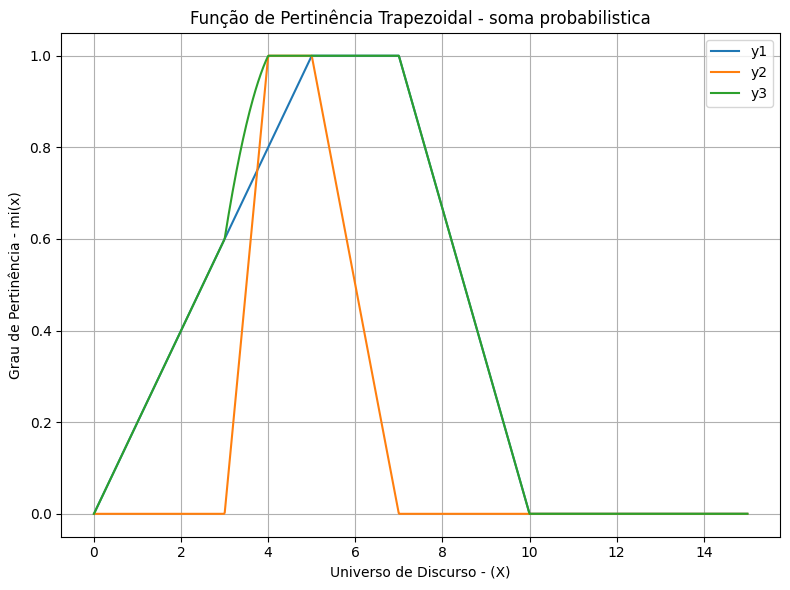

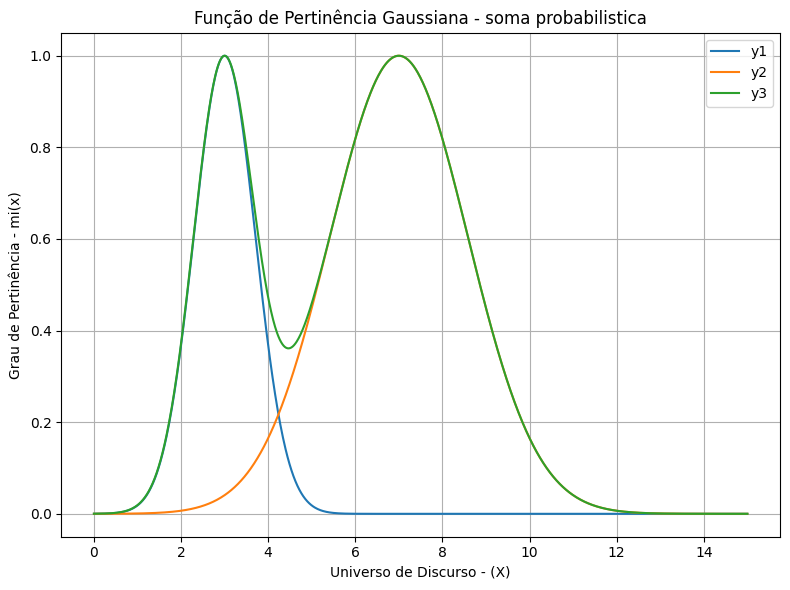

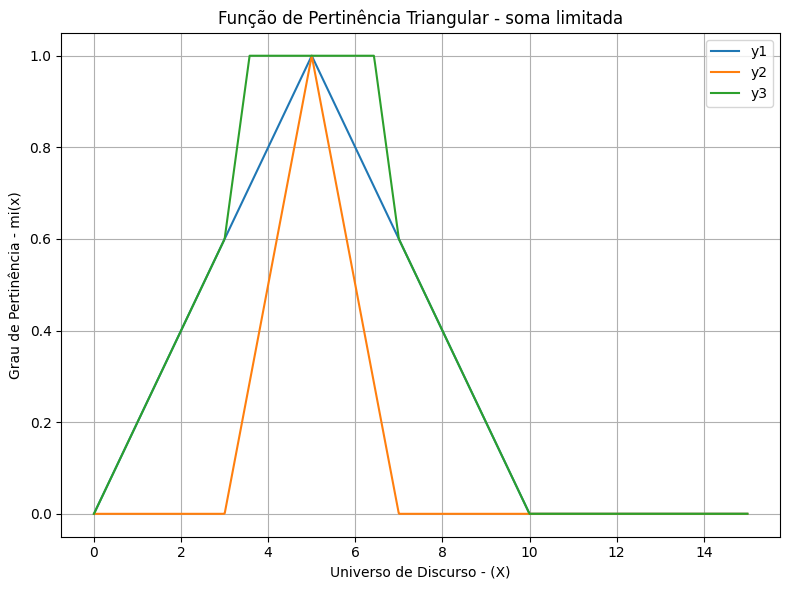

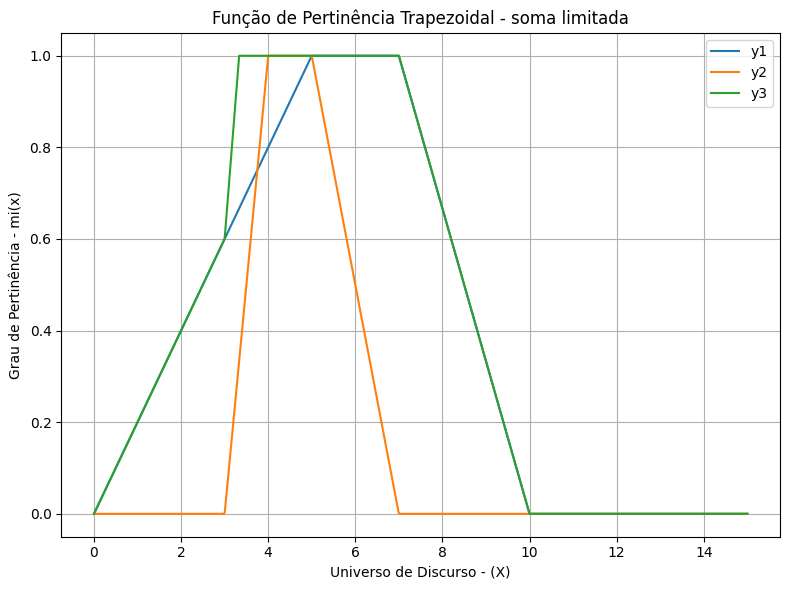

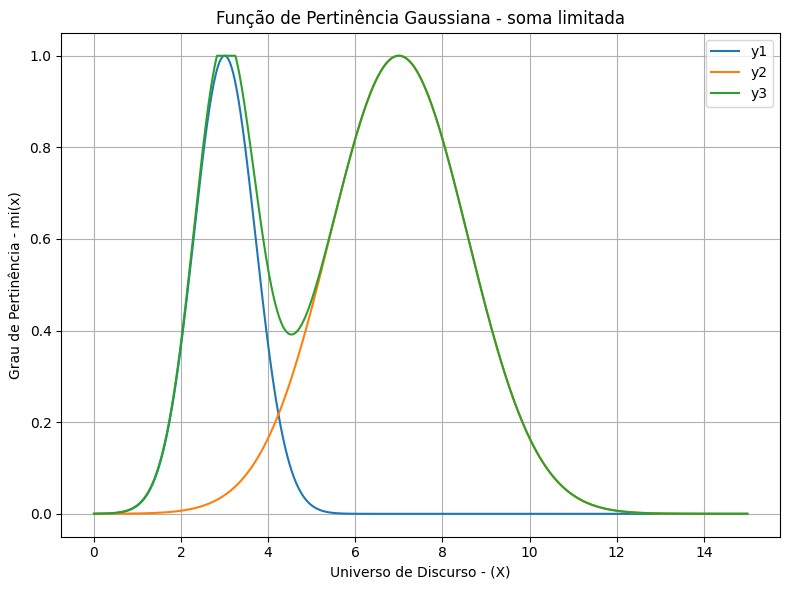

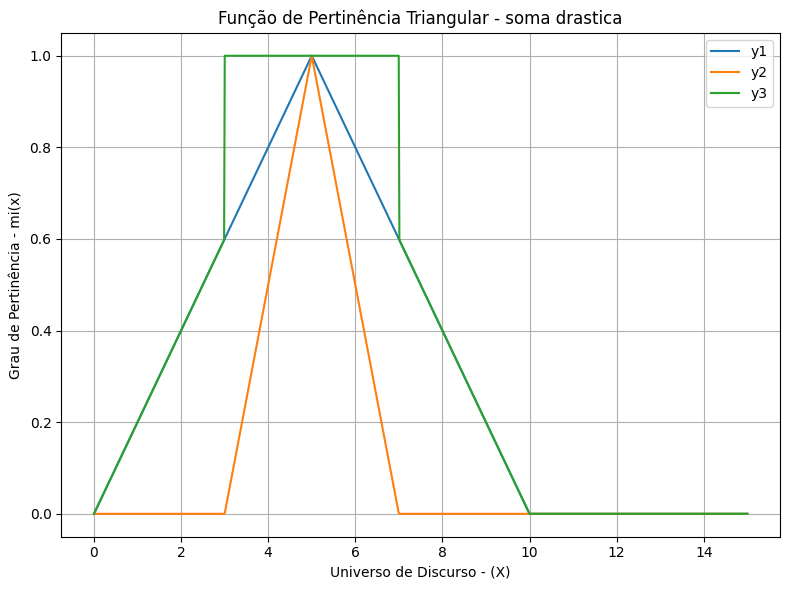

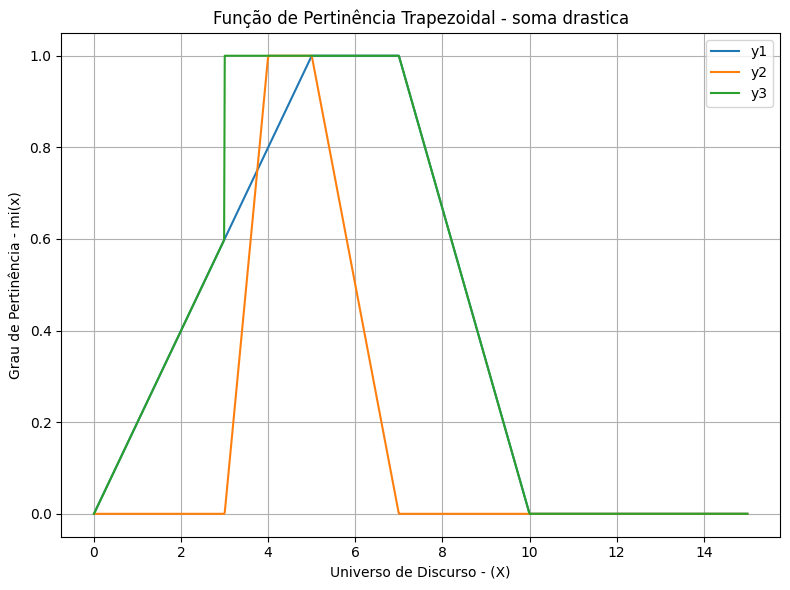

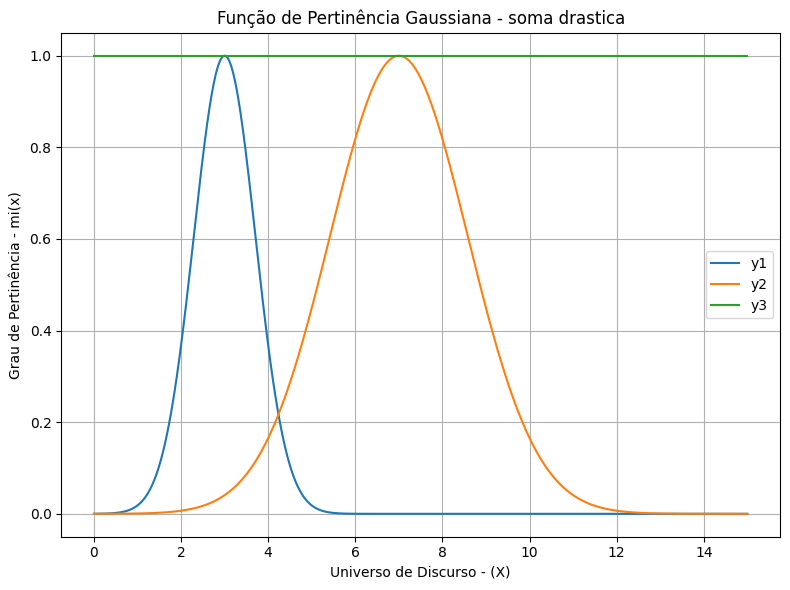

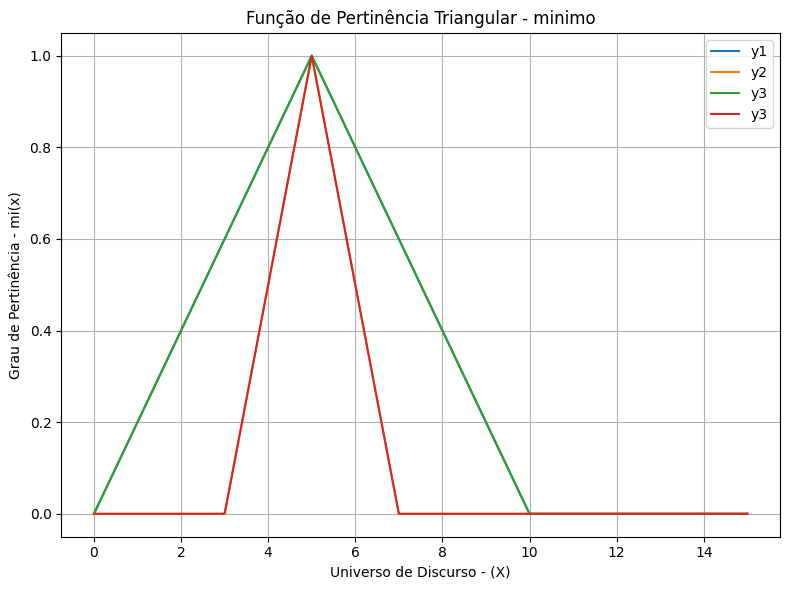

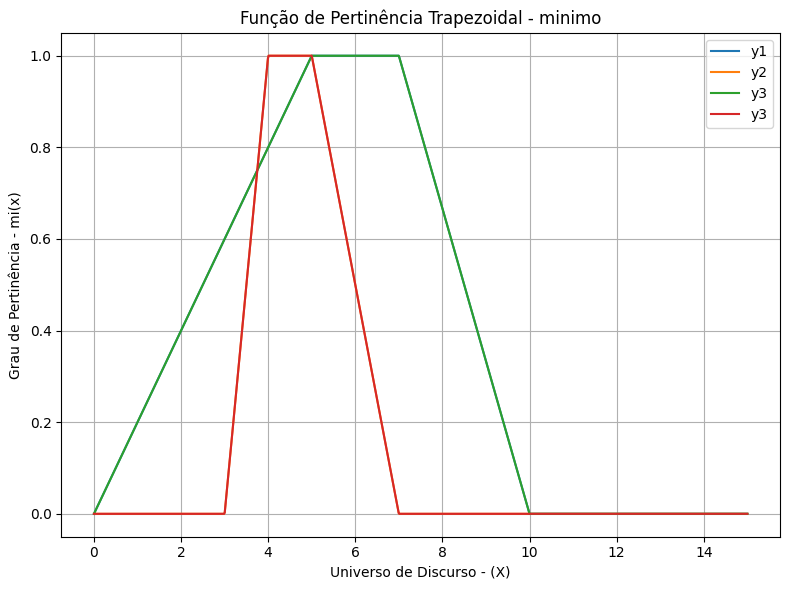

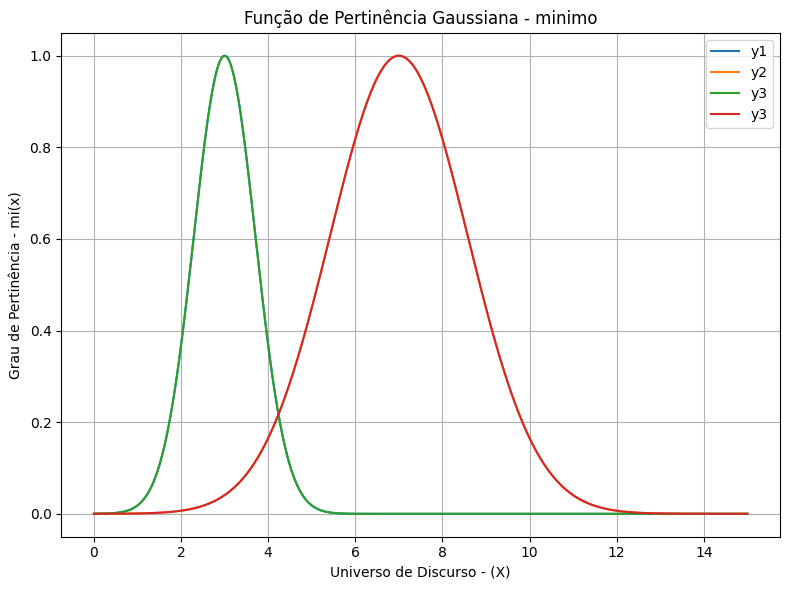

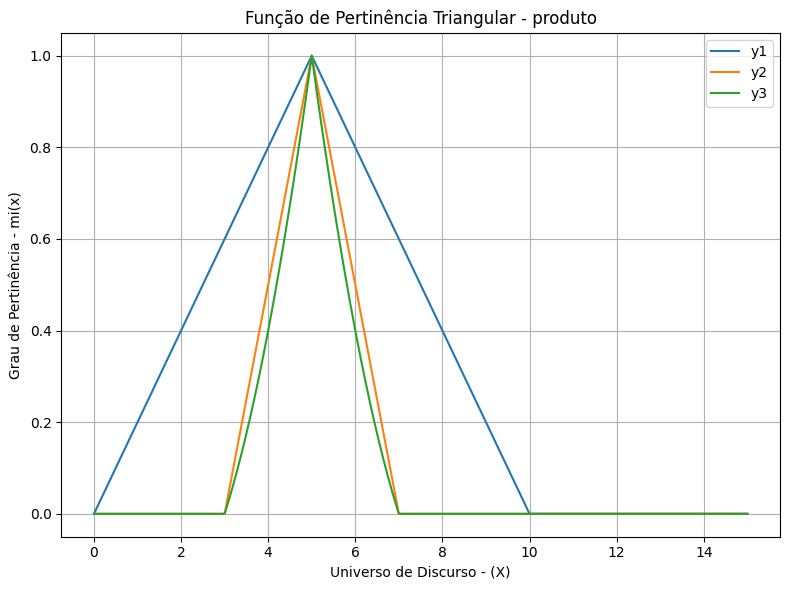

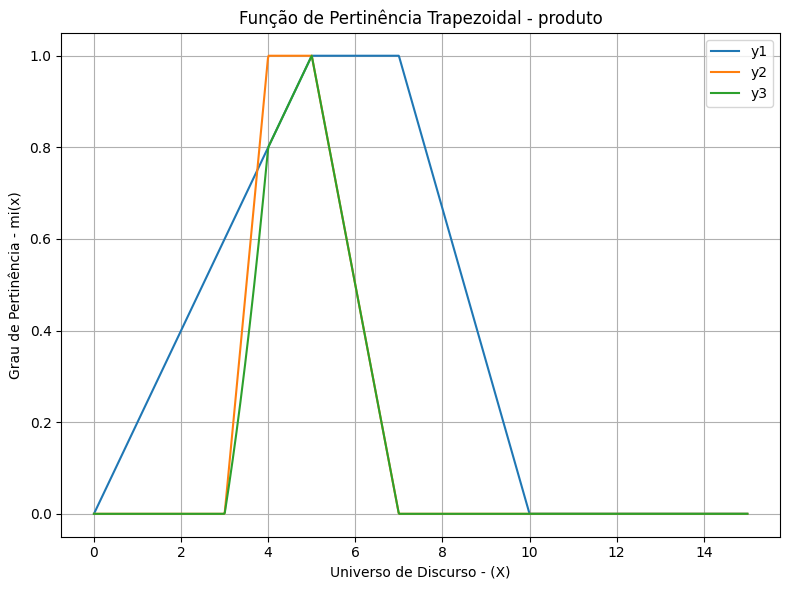

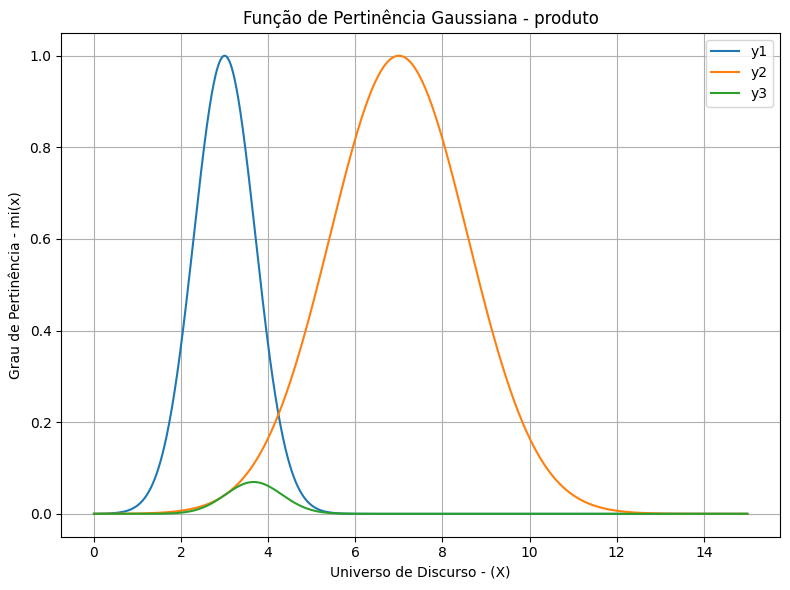

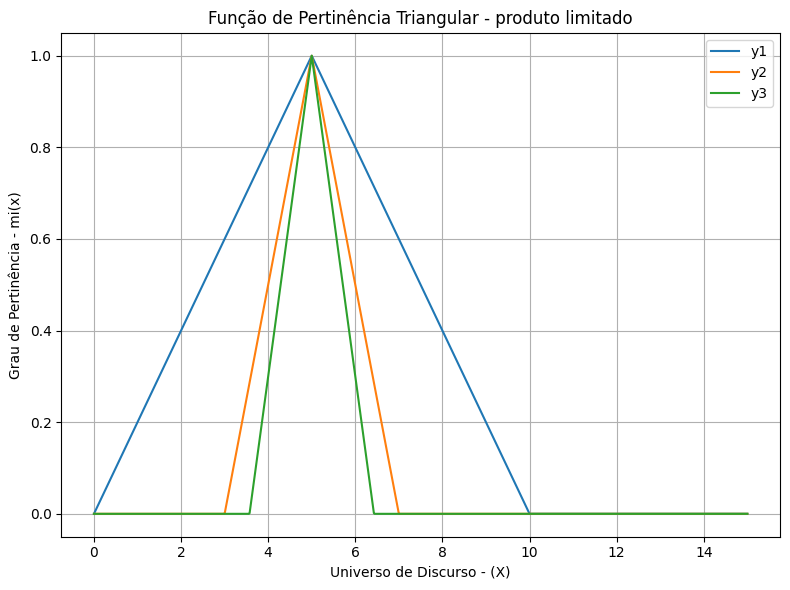

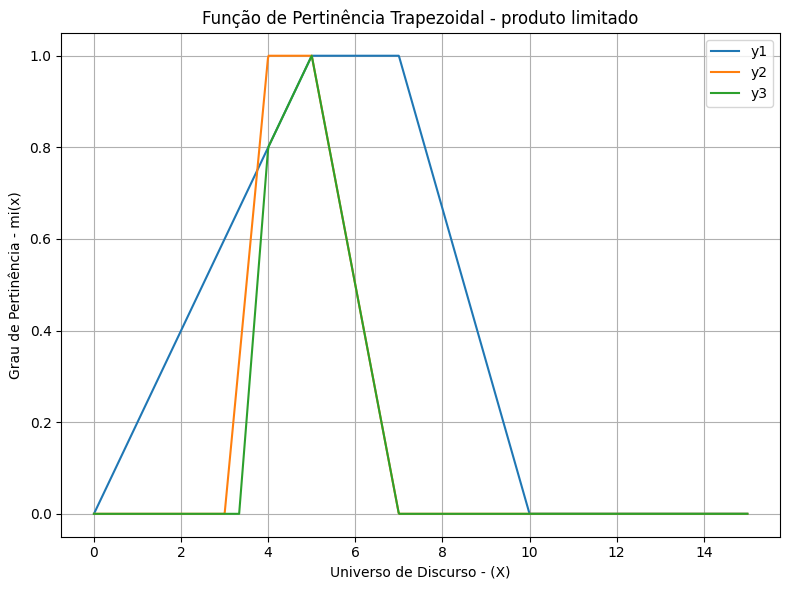

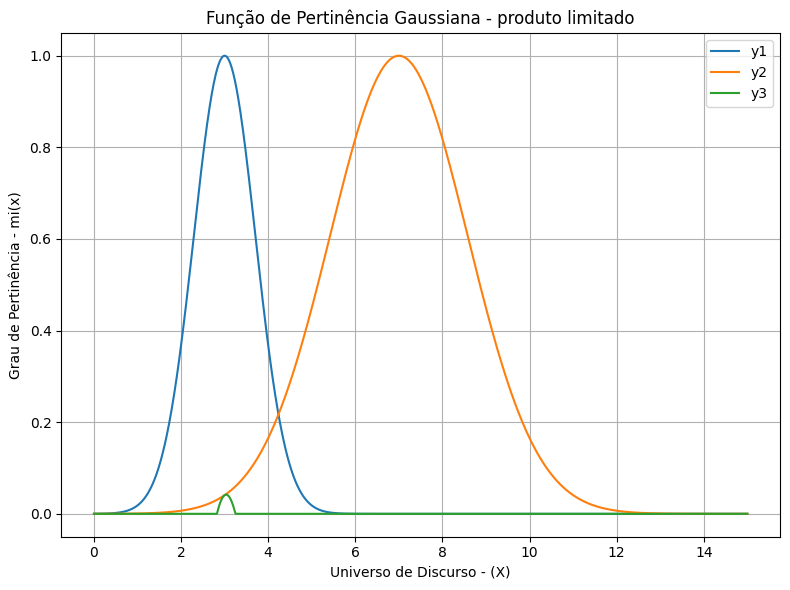

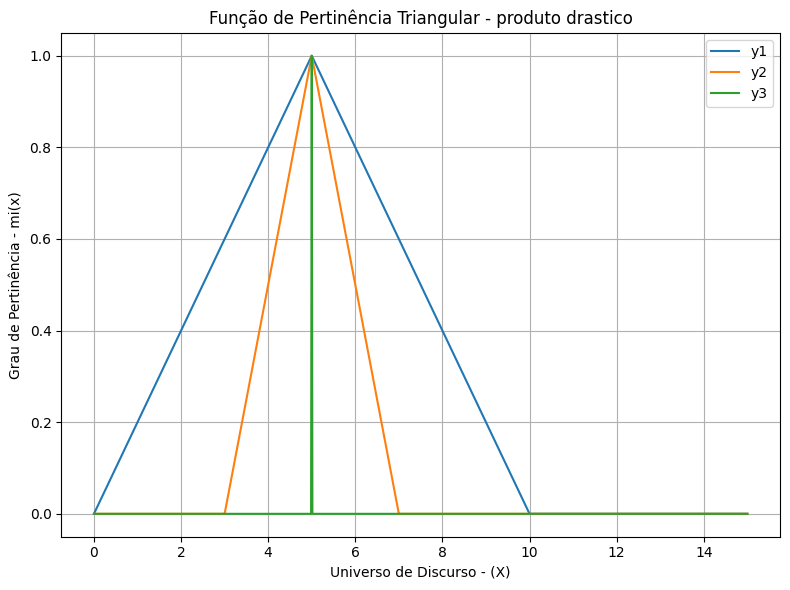

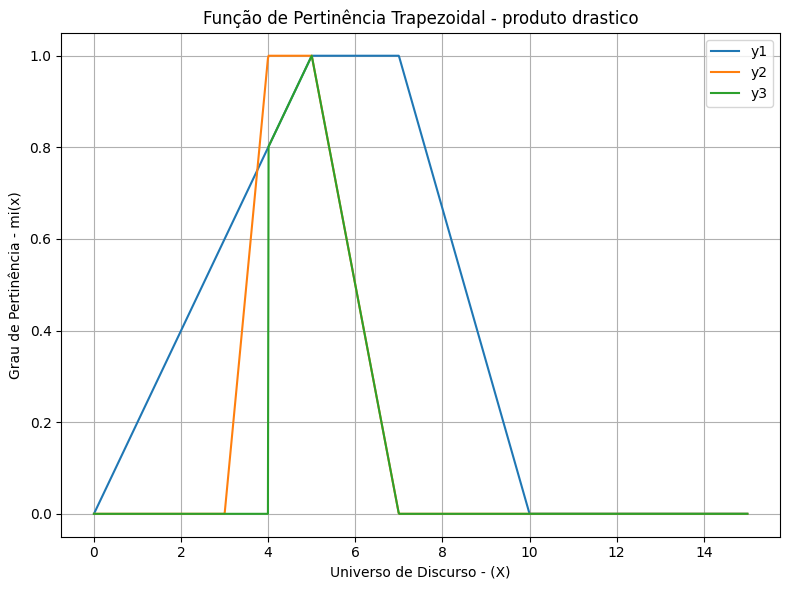

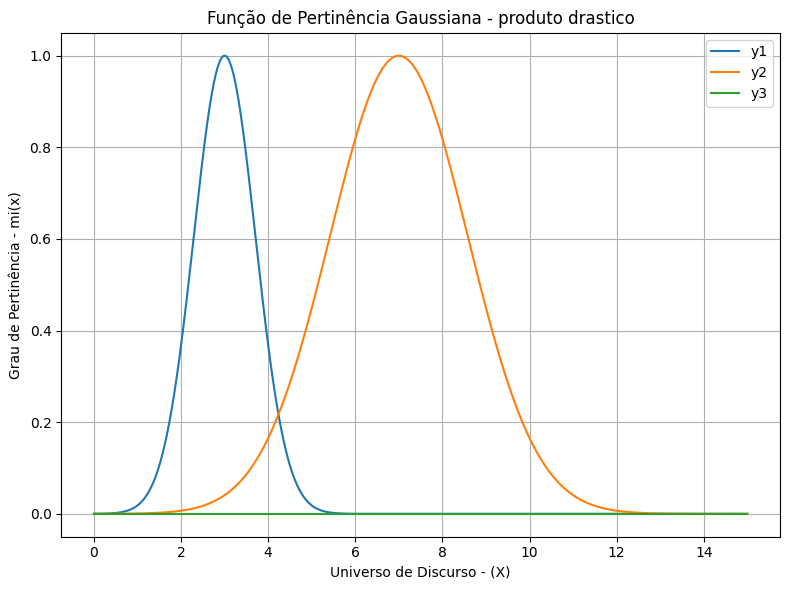

In [8]:
apply_operation("zadeh", ytrg, ytrp, ygauss, 3, 2)
apply_operation("sugeno", ytrg, ytrp, ygauss, 3, 2)
apply_operation("yager", ytrg, ytrp, ygauss, 3, 2)
apply_operation("maximo", ytrg, ytrp, ygauss, 3, 2)
apply_operation("soma probabilistica", ytrg, ytrp, ygauss, 3, 2)
apply_operation("soma limitada", ytrg, ytrp, ygauss, 3, 2)
apply_operation("soma drastica", ytrg, ytrp, ygauss, 3, 2)
apply_operation("minimo", ytrg, ytrp, ygauss, 3, 2)
apply_operation("produto", ytrg, ytrp, ygauss, 3, 2)
apply_operation("produto limitado", ytrg, ytrp, ygauss, 3, 2)
apply_operation("produto drastico", ytrg, ytrp, ygauss, 3, 2)